# Finding a good value for λₐ of a constrained optimization

Here, we play around with different choices for λₐ, for `scripts/2022-01-13_constrained_stage1.jl`

In [1]:
using DrWatson
@quickactivate "RydbergKrotovSpectralConstraints"

In [2]:
using QuantumControl

In [3]:
using RydbergKrotovSpectralConstraints: run_oct, ns, show_pulse

In [4]:
using LinearAlgebra
BLAS.set_num_threads(1)

In [5]:
using Plots
gr()

Plots.GRBackend()

In [6]:
GHz = 1/ns

2.418884326578948e-8

For testing purposes, we define an infohook that plots the pulse after each iteration

In [7]:
TLIST = collect(range(0, 138.0ns, length=1380))
function show_pulse_info_hook(wrk, iteration, pulses, guess)
    show_pulse(pulses...; tlist=TLIST)
    return nothing
end

info_hook = QuantumControl.chain_infohooks(
    QuantumControl.Krotov.print_table,
    show_pulse_info_hook
);

Somewhere between `λₐ=1e12` and `λₐ=1e11` (try it!) is a hard limit. But maybe we want to go a bit slower even the `λₐ=1e12` at the beginning.

Note: I'm actually not sure why λₐ has to be so huge. Normally we work with much smaller values. Is this because of our choice of units?

** Initialize objective
α = 1.0e-11
T / ns = 138.0
nt = 1380
** Propagate guess pulse

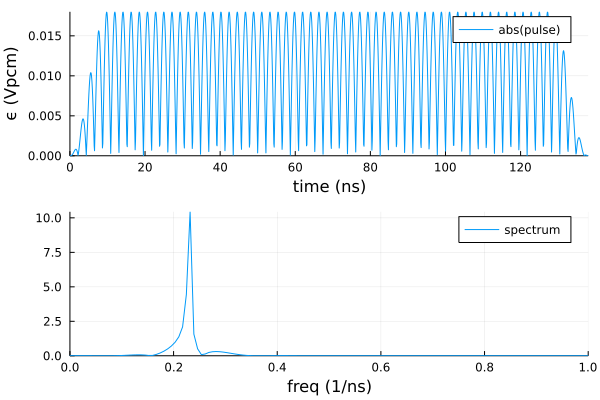

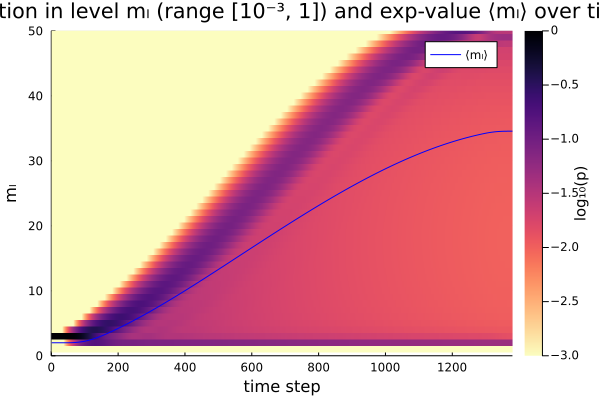



    Final time ⟨m_ₗ⟩: 34.564037248776884
** Define control problem
** Run optimization
 iter.

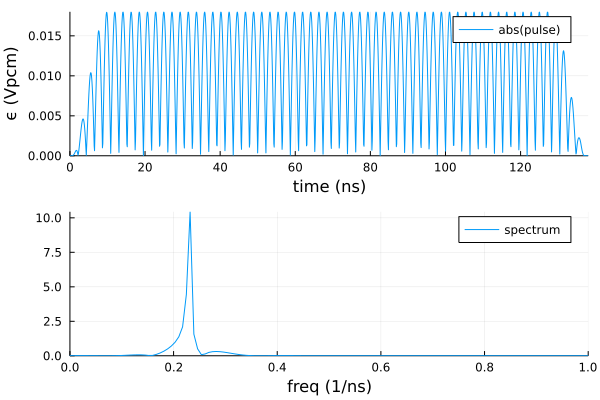

        J_T   ∫gₐ(t)dt          J       ΔJ_T         ΔJ    secs
     0   6.79e-01   0.00e+00   6.79e-01        n/a        n/a    11.8

     1

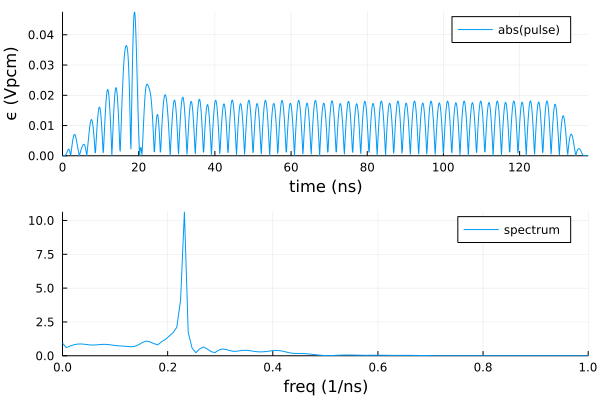

   6.52e-01   1.36e-02   6.65e-01  -2.71e-02  -1.34e-02    23.2

     2

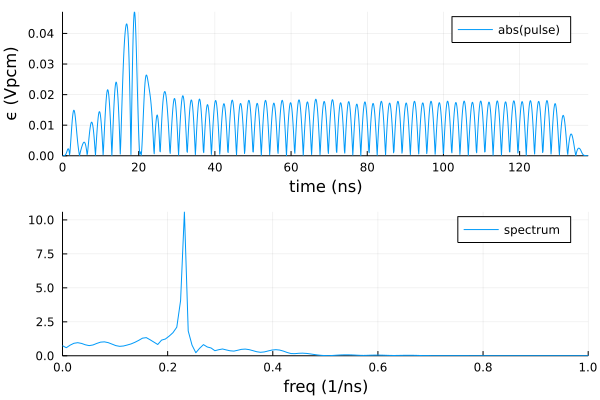

   6.40e-01   7.02e-03   6.47e-01  -1.20e-02  -4.98e-03    22.1

     3

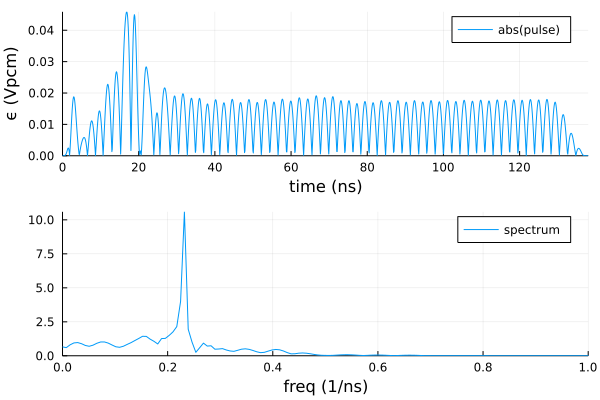

   6.37e-01   1.93e-03   6.39e-01  -2.53e-03  -6.02e-04    22.3

     4

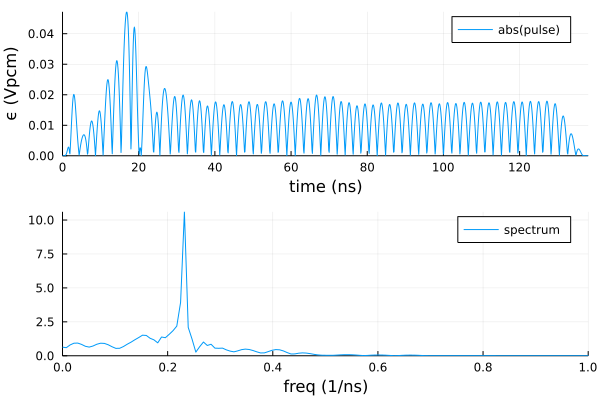

   6.36e-01   6.25e-04   6.37e-01  -9.00e-04  -2.75e-04    22.4

     5

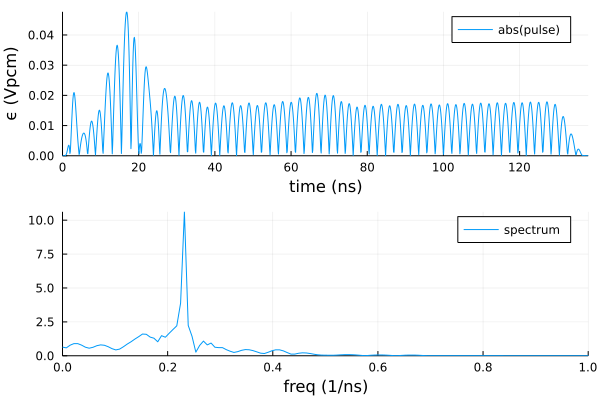

   6.35e-01   6.04e-04   6.36e-01  -9.94e-04  -3.90e-04    22.4

     6

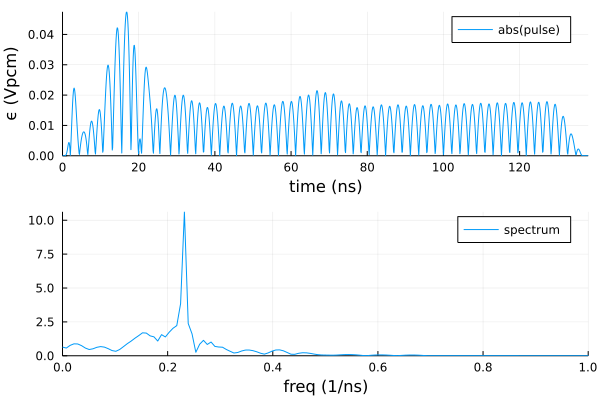

   6.34e-01   7.63e-04   6.35e-01  -1.16e-03  -4.00e-04    22.4

     7

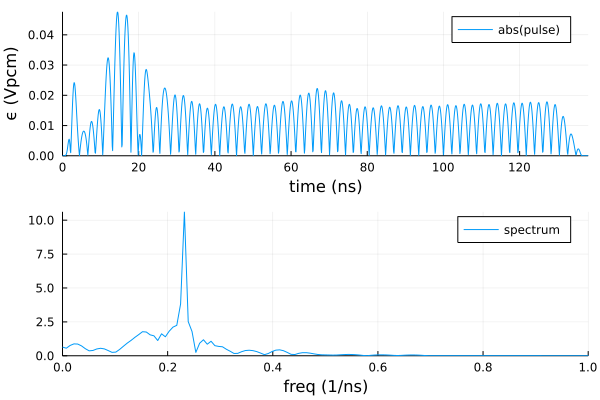

   6.33e-01   9.49e-04   6.34e-01  -1.38e-03  -4.27e-04    22.6

     8

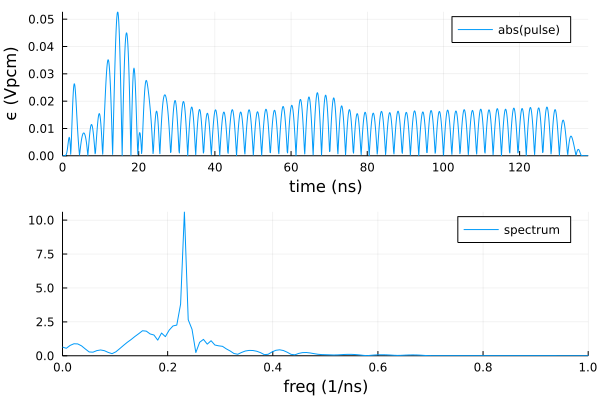

   6.31e-01   1.10e-03   6.32e-01  -1.55e-03  -4.52e-04    22.5

     9

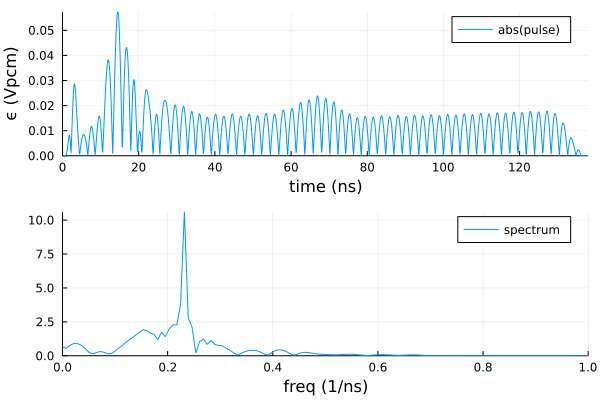

   6.29e-01   1.23e-03   6.31e-01  -1.70e-03  -4.70e-04    22.5

    10

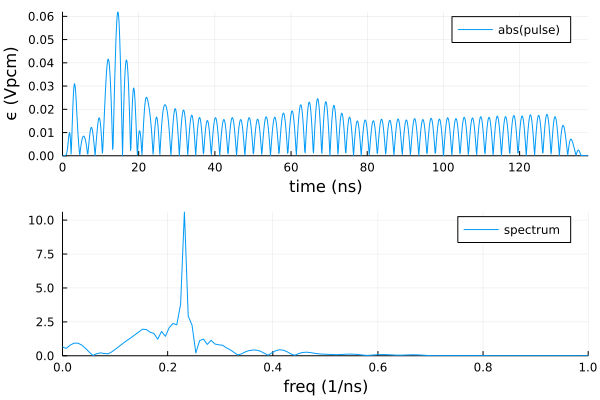

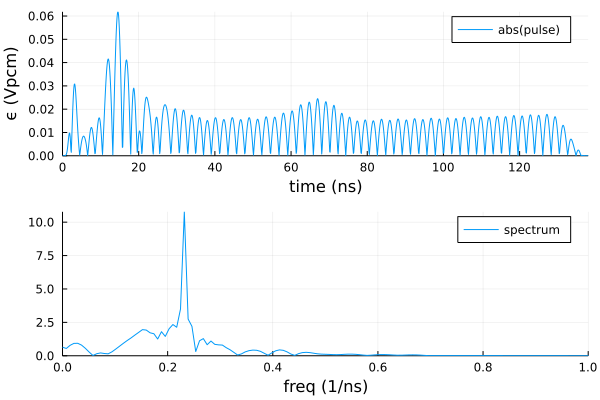

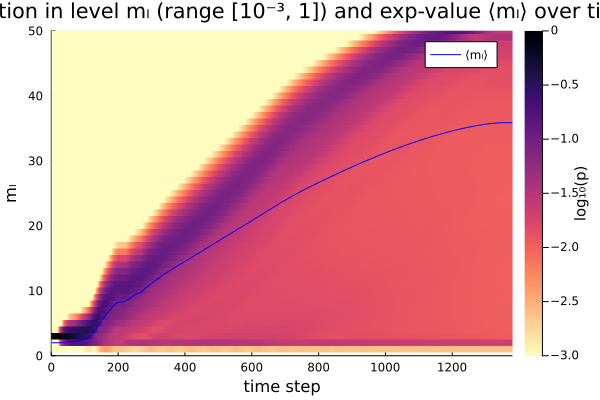

   6.27e-01   1.38e-03   6.29e-01  -1.86e-03  -4.79e-04    22.6


** Propagate optimized pulse

    Final time ⟨m_ₗ⟩: 35.86986224305476
DONE


Krotov Optimization Result
--------------------------
- Started at 2022-01-14T06:13:46.802
- Number of objectives: 1
- Number of iterations: 10
- Value of functional: 6.27430e-01
- Reason for termination: Reached maximum number of iterations
- Ended at 2022-01-14T06:17:43.564 (3 minutes, 56 seconds, 762 milliseconds)


In [8]:
run_oct(ν_max=0.7GHz, λₐ=1e12, iter_stop=10, info_hook=info_hook)